In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [3]:
print("Dataset Preview:")
display(df.head())


Dataset Preview:


,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor,FP16,FP32,FP64
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD,NaN,NaN,NaN


In [4]:
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
       Process_Size          TDP     Die_Size   Transistors    Frequency  \
count   4845.000000  4854.000000  4854.000000   4854.000000  4854.000000   
mean      55.109598    81.359981   188.440445   1929.922279  1484.406057   
std       44.998676    71.683029   116.523337   3736.859205  1066.701523   
min        0.000000     1.000000     1.000000      8.000000   100.000000   
25%       22.000000    35.000000   112.000000    180.000000   590.000000   
50%       40.000000    67.000000   177.000000    950.000000  1073.500000   
75%       90.000000    95.000000   221.000000   1929.922279  2400.000000   
max      250.000000   900.000000   826.000000  54200.000000  4700.000000   

                FP16          FP32          FP64  
count     536.000000   1948.000000   1306.000000  
mean     8397.459851   2134.756653    363.670511  
std     13799.551131   3898.431487   1145.931856  
min        10.020000     12.800000      3.600000  
25%       768.800000    257.300000     38.

## TDP DISTRIBUTION

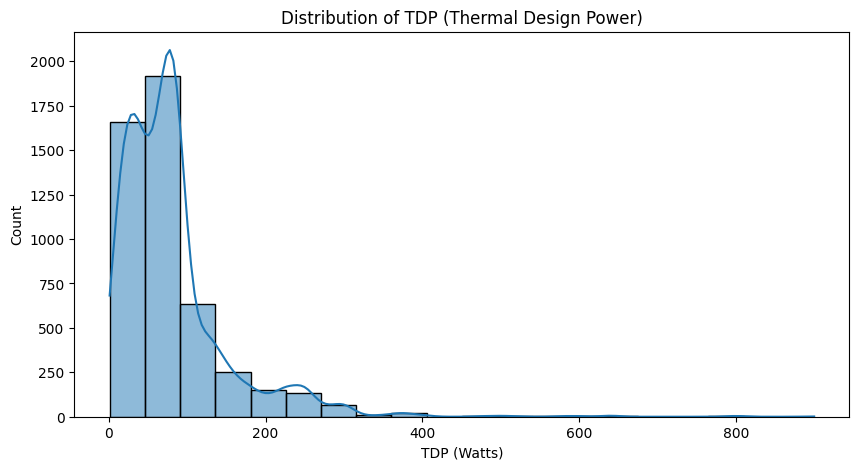

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['TDP'], bins=20, kde=True)
plt.title("Distribution of TDP (Thermal Design Power)")
plt.xlabel("TDP (Watts)")
plt.ylabel("Count")
plt.show()


**Higher TDP values indicate higher power consumption and heat generation.**

## Boxplot to detect outliers

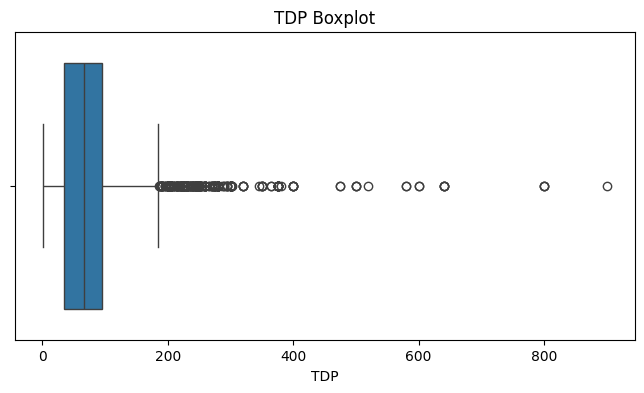

In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['TDP'])
plt.title("TDP Boxplot")
plt.show()

**Some chips have extreme power consumption, which may indicate inefficiencies or high-performance models.**

## Compare Average Frequency per Manufacturer

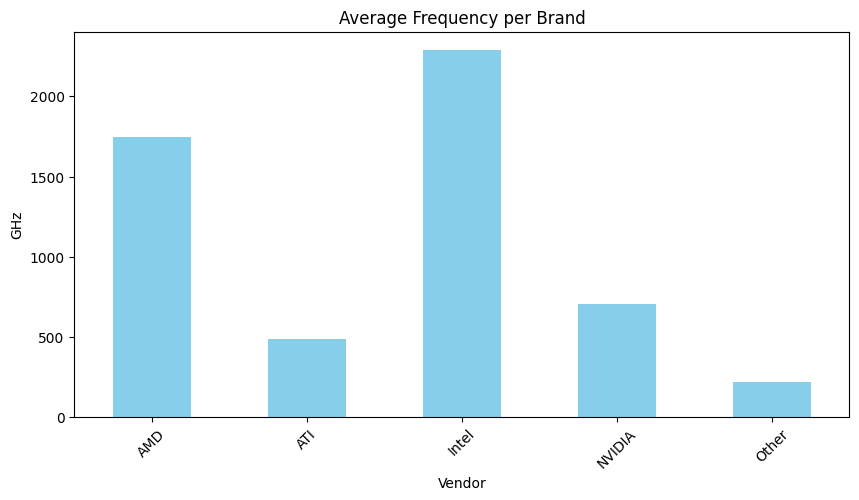

In [7]:
plt.figure(figsize=(10,5))
df.groupby('Vendor')['Frequency'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Frequency per Brand")
plt.ylabel("GHz")
plt.xticks(rotation=45)
plt.show()

**Some manufacturers prioritize higher clock speeds for performance gains. Intel shows the highest frequency and next is AMD**

## Transistor Count vs Frequency

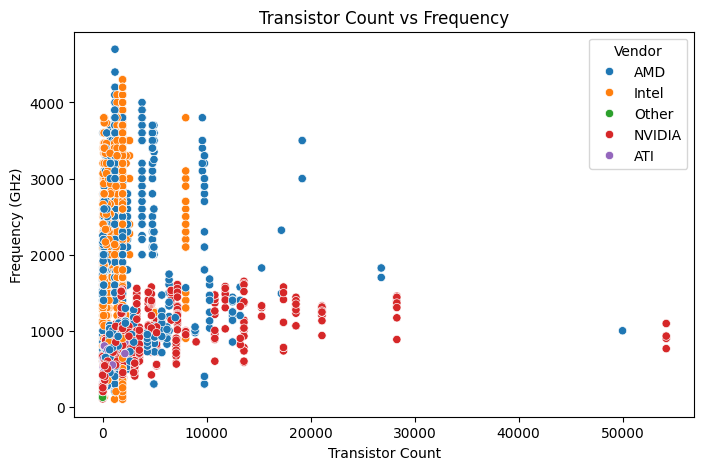

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Transistors'], y=df['Frequency'], hue=df['Vendor'])
plt.title("Transistor Count vs Frequency")
plt.xlabel("Transistor Count")
plt.ylabel("Frequency (GHz)")
plt.show()

**A higher transistor count may lead to increased frequency but could also impact power consumption.**

## TDP Trends Over Time

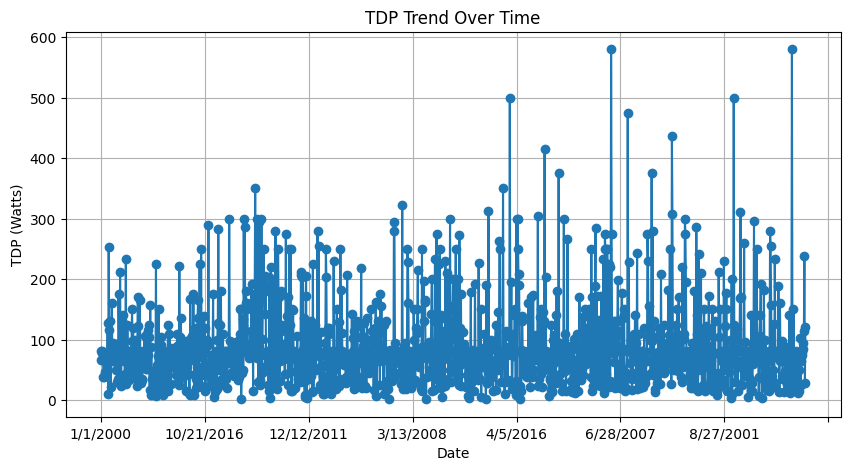

In [9]:
plt.figure(figsize=(10,5))
df.groupby('Date')['TDP'].mean().plot(kind='line', marker='o')
plt.title("TDP Trend Over Time")
plt.ylabel("TDP (Watts)")
plt.xlabel("Date")
plt.grid()
plt.show()

**Over time, manufacturers may be optimizing TDP to balance efficiency and performance.**